# Cubic Spline Interpolation

Aufgabenstellung: Testen ob eine Funktion eine kubische Spline-Interpolierende ist.

 - Gegeben: $n+1$ Punkte.
 - Gesucht: kubische Spline-Interpolierende $S(x)$ für die gegebenen Punkte

In [1]:
# input: given points
points = [
    (1, -5),
    (3, 3),
    (4, 4),
]
#

In [2]:
points = [vector(p) for p in points]
n = len(points) - 1

Berechnen $a_0$ bis $a_{n+1}$

$$a_i = y_i$$



In [3]:
a = [p[1] for p in points]
show(a)

[-5, 3, 4]

Berechnen $h_0$ bis $h_{n}$

$$h_i = x_{i+1} - x_i$$

In [4]:
h = [points[i+1][0] - points[i][0] for i in range(n)]
show(h)

[2, 1]

Anlegen der Matrix $A \in M(n \times n)$

In [5]:
A = matrix([[1] + [0] * (n) ] +\
[[0]*i + [h[i], 2*(h[i] + h[i+1]), h[i+1]] + [0]*(n - 2 - i) for i in range(n-1)] \
+ [ [0] * (n) + [1] ])
show(A)

[1 0 0]
[2 6 1]
[0 0 1]

und des Vektors $\bar{b}$

In [6]:
bv = vector([0] + [(3/h[i+1]*(a[i+2] - a[i+1]))- (3/h[i]*(a[i+1] - a[i])) for i in range(n-1)] + [0])
show(bv)

(0, -9, 0)

Erweitere Koeffizientenmatrix vom System $A \cdot c = \bar{b}$

In [7]:
_Ab = matrix([A.T[i] for i in range(A.ncols())] + [bv]).T
show(_Ab.echelon_form())

[   1    0    0    0]
[   0    1    0 -3/2]
[   0    0    1    0]

Oder die Inverse um direkt $c = A^{-1} \cdot \bar{b}$ zu berechnen

In [8]:
show(A^-1)

[   1    0    0]
[-1/3  1/6 -1/6]
[   0    0    1]

Lösung von $A c = \bar{b}$ ergibt $c = \{c_0, c_1, \ldots, c_n\}$

In [9]:
c = (A^-1 * bv)
show(c)
c = list(c)

(0, -3/2, 0)

$$b_i = \frac{1}{h_i}(a_{i+1} - a_i) - \frac{h_i}{3}(2 c_i + c_{i+1})$$

In [10]:
b = [1/h[i] * (a[i+1]-a[i]) - h[i]/3*(2*c[i]+c[i+1]) for i in range(n)]
show(b)

[5, 2]

$$d_i = \frac{c_{i+1} - c_i}{3 h_i}$$

In [11]:
d = [(c[i+1]-c[i])/(3*h[i]) for i in range(n)]
show(d)

[-1/4, 1/2]

In [12]:
show(LatexExpr('a_i = '), a)
show(LatexExpr('b_i = '), b)
show(LatexExpr('c_i = '), c)
show(LatexExpr('d_i = '), d)
show(LatexExpr('h_i = '), h)

a_i =  [-5, 3, 4]

b_i =  [5, 2]

c_i =  [0, -3/2, 0]

d_i =  [-1/4, 1/2]

h_i =  [2, 1]

Die Teilststücke von $S(x)$ sind dann:
$$S_i(x) = a_i + b_i(x - x+i) + c_i (x - x_i)^2 + d_i (x - x_i)^3$$

In [13]:
# all the splines
var('x')
S = [a[i] + (b[i] * (x - points[i][0])) + (c[i] * (x - points[i][0])^2) + (d[i] * (x - points[i][0])^3)
     for i in range(n)]
for i, s in enumerate(S):
    show(LatexExpr("S_{} =".format(i)), s.simplify_full())

S_0 = -1/4*x^3 + 3/4*x^2 + 17/4*x - 39/4

S_1 = 1/2*x^3 - 6*x^2 + 49/2*x - 30

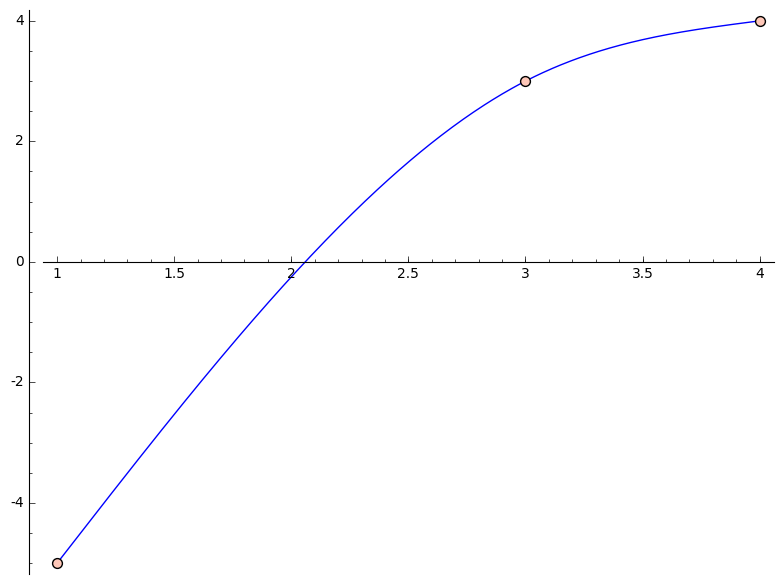

In [14]:
# plot the points and the splines for their interval
scatter_plot(points) + \
sum(plot(s, xmin=points[i][0], xmax=points[i+1][0]) for i, s in enumerate(S))

In [15]:
# Sanity checking:
# no output means, that the conditions of cubic splines match. This should always be the case if there are no bugs.
for i in range(len(S)-1):
    if S[i].subs(x=points[i+1][0]) != S[i+1].subs(x=points[i+1][0]):
        print "Spline {} and {} don't match at x = {}".format(i, i+1, points[i+1][0])
    if S[i].derivative().subs(x=points[i+1][0]) != S[i+1].derivative().subs(x=points[i+1][0]):
        print "Derivative of spline {} and {} don't match at x = {}".format(i, i+1, points[i+1][0])
    if S[i].derivative().derivative().subs(x=points[i+1][0]) != S[i+1].derivative().derivative().subs(x=points[i+1][0]):
        print "Second derivative of spline {} and {} don't match at x = {}".format(i, i+1, points[i+1][0])

if S[0].derivative().derivative().subs(x=points[0][0]) != 0:
    print "Second derivative of first spline at first point must be 0"
    
if S[-1].derivative().derivative().subs(x=points[-1][0]) != 0:
    print "Second derivative of last spline at last point must be 0"